### Contains:
##### 5. Mountain car 
##### 1. Previous and currect state
##### 3. Visualization of solution area

### 5. Mountain car

In [2]:
import gym
import torch
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import os
#os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

env = gym.make("MountainCarContinuous-v0")

GitHub for this task: https://github.com/openai/gym/wiki/MountainCarContinuous-v0

In [2]:
print("Action space ", env.action_space)
print("Observation space: ", env.observation_space)

Action space  Box(-1.0, 1.0, (1,), float32)
Observation space:  Box(-1.2000000476837158, 0.6000000238418579, (2,), float32)


First of all let's just find policy for this task

Let's push the car in that way, that it move in this moment

In [3]:
def get_corr_action(observation):
    #action = random.choice([-1,1])
    lst = []
    #pos = state[0]
    vel = observation[1]
    if(vel >= 0):
        lst.append(1)
    if(vel<0):
        lst.append(0)
    return lst

In [4]:
observation = env.reset()
done= False
t = 0
while(not done):
    action = get_corr_action(observation)
    t = t+1
    observation, reward, done, _ = env.step(action)
    env.render()
print("Success in ", t, " steps")
env.close()

Success in  122  steps


That was easy! The best solution, probably, come in 120 turns

But now let's train weights - matrix 2x2, and find best

Reward formula will be the next -if we reach the point before 500 steps - we will recive (1000-n)/10 points. After 1k iteractions (1 - min_distance)*50

In [5]:
class Agent():
    def __init__(self,env):
        self.action_size = 2
        print("Action size: ", self.action_size)
    
    def run_episode(self, env, weight):
        obs = env.reset()
        dist = 0.5 - obs[0]
        done = False
        for i in range(500):
            if done:
                print("Success on ", i+1, "steps")
                return (1000-i)/10
            obs = torch.from_numpy(obs).float()
            action = torch.argmax(torch.matmul(obs, weight))
            lst = []
            lst.append(action.numpy())
            obs, reward, done, _ = env.step(lst)
            dist = min(dist, 0.5 - obs[0])
            #env.render()
        return (1.1 - dist) * 50

    def run_with_render(self, env, weight):
        obs = env.reset()
        dist = 0.5 - obs[0]
        done = False
        for i in range(500):
            if done:
                print("Success in ", i, "steps")
                return (1000-i)/10
            obs = torch.from_numpy(obs).float()
            action = torch.argmax(torch.matmul(obs, weight))
            lst = []
            lst.append(action.numpy())
            obs, reward, done, _ = env.step(lst)
            dist = min(dist, 0.5 - obs[0])
            env.render()
        env.close()
        return (1.1 - dist) * 50 

In [6]:
num_of_episodes = 300

best_total_reward = 0
best_weight = None

total_rewards = []

ag = Agent(env)
sum_of_reward = 0

for episode in range(num_of_episodes):
    weight = torch.rand(2, 2)
    total_reward = ag.run_episode(env, weight)
    sum_of_reward += total_reward
    print('Episode {}: {}'.format(episode+1, total_reward))
    if total_reward > best_total_reward:
        best_weight = weight
        best_total_reward = total_reward
    total_rewards.append(total_reward)
    
print("Average reward ", sum(total_rewards)/300)

Action size:  2
Episode 1: 3.9609141410691495
Episode 2: 30.487863258717677
Episode 3: 28.386598833730197
Episode 4: 30.597530566126967
Episode 5: 8.609006682868214
Episode 6: 9.188525133640013
Episode 7: 22.57994776820758
Episode 8: 4.273288882901582
Episode 9: 6.637675348878474
Episode 10: 4.391600538578744
Episode 11: 28.555665419054105
Episode 12: 7.347535710854302
Episode 13: 21.033707497692355
Episode 14: 30.621247065461315
Episode 15: 20.603944802879614
Episode 16: 20.765323477843044
Episode 17: 23.12366593086212
Episode 18: 27.208238681446893
Episode 19: 21.73554839970065
Episode 20: 23.191899358949048
Episode 21: 28.310079052854427
Episode 22: 23.63616644503973
Episode 23: 30.305171675355403
Episode 24: 30.75945792770177
Episode 25: 5.248943209491386
Episode 26: 23.263687414361893
Episode 27: 3.930337637360104
Episode 28: 30.72076925752437
Success on  131 steps
Episode 29: 87.0
Episode 30: 4.569939643150889
Success on  124 steps
Episode 31: 87.7
Episode 32: 5.987788015929063
E

Episode 272: 29.731631467231907
Episode 273: 4.939497242448876
Episode 274: 13.172073322032462
Episode 275: 9.59786271010923
Episode 276: 9.877465022237159
Episode 277: 26.071776605043723
Episode 278: 5.5880989315281795
Episode 279: 20.620606334997138
Episode 280: 7.360414451179337
Episode 281: 4.672068739157931
Episode 282: 9.944339933918013
Episode 283: 4.260103244364477
Episode 284: 29.696959846923964
Episode 285: 5.113180148888164
Episode 286: 6.7015607815927964
Episode 287: 15.686675191211119
Episode 288: 22.574106312882986
Episode 289: 6.65029378158743
Episode 290: 30.078918226729634
Episode 291: 5.353697401807195
Episode 292: 29.025941313008722
Episode 293: 22.179244348200587
Episode 294: 5.142598182838077
Episode 295: 22.95974121239448
Success on  130 steps
Episode 296: 87.1
Episode 297: 23.57467596216358
Episode 298: 4.940089144931492
Episode 299: 24.28175130302568
Episode 300: 20.06126749460797
Average reward  17.679251371770924


In [8]:
print(best_total_reward)
print(best_weight.numpy())
another_time = ag.run_with_render(env, best_weight)
print(another_time)
env.close()

88.0
[[0.59542745 0.49946958]
 [0.02132016 0.87486905]]
25.61125808925396


After 300 episodes we randomly find weight, that probably deal with task, and this weights may provide the fastest hill climb, then other randoms, and even our "Ideal" strategy. Maybe, this happened because we don't waste time on extra speed, while move to the left corner.

But this solution is not enouth good, too. Let's avoid random on each iteration, and add noise scale to find the most stable result

Remark - we want to find not fastest way out, we want to find most stable way. So if we find total reward, that more or equals than 50 point(the "longest" winning stratagy), this strategy is good for us.

In [9]:
best_weight = torch.rand(2, 2)
noise = 0.1
best_total_reward = 0
total_rewards = []

for episode in range(num_of_episodes):
    weight = best_weight + noise * torch.rand(2,2)
    total_reward = ag.run_episode(env, weight)
    sum_of_reward += total_reward
    print('Episode {}: {}'.format(episode+1, total_reward))
    if total_reward >= 50: # here is important part
        best_total_reward = total_reward
        best_weight = weight
        noise = max(noise / 2, 1e-4)
    else:
        noise = min(noise * 2, 2)
    total_rewards.append(total_reward)
    
print("Average reward ", sum(total_rewards[200:])/100)

Success on  127 steps
Episode 1: 87.4
Episode 2: 27.817347905605388
Episode 3: 23.893030865704496
Success on  125 steps
Episode 4: 87.6
Success on  217 steps
Episode 5: 78.4
Episode 6: 22.141132545035898
Success on  119 steps
Episode 7: 88.2
Success on  120 steps
Episode 8: 88.1
Episode 9: 22.647221436231902
Success on  130 steps
Episode 10: 87.1
Episode 11: 23.97389318982629
Success on  127 steps
Episode 12: 87.4
Success on  203 steps
Episode 13: 79.8
Episode 14: 21.000318324214994
Success on  211 steps
Episode 15: 79.0
Episode 16: 22.928356302980134
Episode 17: 23.683515324967242
Episode 18: 25.65524204450448
Episode 19: 23.019046934569836
Success on  204 steps
Episode 20: 79.7
Episode 21: 20.554036631697016
Success on  119 steps
Episode 22: 88.2
Episode 23: 22.120368394248086
Success on  125 steps
Episode 24: 87.6
Episode 25: 21.55807678387586
Success on  135 steps
Episode 26: 86.6
Episode 27: 22.18757748902466
Success on  127 steps
Episode 28: 87.4
Success on  132 steps
Episode 29:

Success on  127 steps
Episode 282: 87.4
Success on  120 steps
Episode 283: 88.1
Success on  119 steps
Episode 284: 88.2
Success on  121 steps
Episode 285: 88.0
Success on  125 steps
Episode 286: 87.6
Success on  125 steps
Episode 287: 87.6
Success on  119 steps
Episode 288: 88.2
Success on  121 steps
Episode 289: 88.0
Success on  119 steps
Episode 290: 88.2
Success on  119 steps
Episode 291: 88.2
Success on  121 steps
Episode 292: 88.0
Success on  119 steps
Episode 293: 88.2
Success on  121 steps
Episode 294: 88.0
Success on  126 steps
Episode 295: 87.5
Success on  121 steps
Episode 296: 88.0
Success on  120 steps
Episode 297: 88.1
Success on  124 steps
Episode 298: 87.7
Success on  119 steps
Episode 299: 88.2
Success on  119 steps
Episode 300: 88.2
Average reward  63.93397802624594


In [10]:
print(best_total_reward)
print(best_weight.numpy())
another_time = ag.run_with_render(env, best_weight)
print(another_time)
env.close()

88.2
[[40.205303 40.117706]
 [37.969555 47.209557]]
Success in  120 steps
88.0


After all, our model is finally trained. Once we have found suitable scaling factors, our weights are not affected by the noise. At the last 100 steps of training, the model increased its accuracy by almost 5 times compared to random results.

## Cart pole
### 1. Current+previous state

Let's check, will adding more dimentions to our model significantly improve it
Weight will be matrix 8x2, so for multiplication we must pass to function and concat 2 matices 4x2 - previous&current state

In [11]:
env = gym.make('CartPole-v0')
n_state = env.observation_space.shape[0]
n_action = env.action_space.n
print(n_state, n_action)

4 2


In [12]:
def run_episode(env, weight):
    new_state = env.reset()
    prev_state = new_state
    prev_state = torch.from_numpy(prev_state).float()
    total_reward = 0
    is_done = False
    while not is_done:
        #print(state.shape)
        new_state = torch.from_numpy(new_state).float()
        res_state = torch.cat((new_state, prev_state), 0)
        action = torch.argmax(torch.matmul(res_state, weight))
        prev_state = new_state
        new_state, reward, is_done, _ = env.step(action.item())
        total_reward += reward
    env.close()
    return total_reward

In [13]:
n_episode = 1000

best_total_reward = 0
best_weight = None

total_rewards = []

for episode in range(n_episode):
    weight = torch.rand(n_state*2, n_action)
    total_reward = run_episode(env, weight)
    print('Episode {}: {}'.format(episode+1, total_reward))
    if total_reward > best_total_reward:
        best_weight = weight
        best_total_reward = total_reward
    total_rewards.append(total_reward)
   #break
print('Average total reward over {} episode: {}'.format(n_episode, sum(total_rewards) / n_episode))

Episode 1: 39.0
Episode 2: 72.0
Episode 3: 36.0
Episode 4: 10.0
Episode 5: 8.0
Episode 6: 119.0
Episode 7: 50.0
Episode 8: 10.0
Episode 9: 65.0
Episode 10: 36.0
Episode 11: 22.0
Episode 12: 9.0
Episode 13: 95.0
Episode 14: 168.0
Episode 15: 32.0
Episode 16: 83.0
Episode 17: 52.0
Episode 18: 9.0
Episode 19: 18.0
Episode 20: 44.0
Episode 21: 9.0
Episode 22: 61.0
Episode 23: 47.0
Episode 24: 10.0
Episode 25: 9.0
Episode 26: 9.0
Episode 27: 54.0
Episode 28: 12.0
Episode 29: 8.0
Episode 30: 9.0
Episode 31: 79.0
Episode 32: 10.0
Episode 33: 8.0
Episode 34: 10.0
Episode 35: 197.0
Episode 36: 8.0
Episode 37: 27.0
Episode 38: 186.0
Episode 39: 21.0
Episode 40: 65.0
Episode 41: 200.0
Episode 42: 74.0
Episode 43: 107.0
Episode 44: 35.0
Episode 45: 26.0
Episode 46: 56.0
Episode 47: 48.0
Episode 48: 8.0
Episode 49: 10.0
Episode 50: 65.0
Episode 51: 50.0
Episode 52: 75.0
Episode 53: 156.0
Episode 54: 72.0
Episode 55: 10.0
Episode 56: 8.0
Episode 57: 9.0
Episode 58: 90.0
Episode 59: 9.0
Episode 60: 1

Episode 540: 24.0
Episode 541: 8.0
Episode 542: 200.0
Episode 543: 9.0
Episode 544: 69.0
Episode 545: 10.0
Episode 546: 8.0
Episode 547: 130.0
Episode 548: 17.0
Episode 549: 30.0
Episode 550: 10.0
Episode 551: 29.0
Episode 552: 10.0
Episode 553: 10.0
Episode 554: 96.0
Episode 555: 10.0
Episode 556: 8.0
Episode 557: 10.0
Episode 558: 10.0
Episode 559: 10.0
Episode 560: 9.0
Episode 561: 38.0
Episode 562: 120.0
Episode 563: 9.0
Episode 564: 104.0
Episode 565: 145.0
Episode 566: 59.0
Episode 567: 51.0
Episode 568: 168.0
Episode 569: 10.0
Episode 570: 10.0
Episode 571: 36.0
Episode 572: 9.0
Episode 573: 9.0
Episode 574: 37.0
Episode 575: 9.0
Episode 576: 101.0
Episode 577: 8.0
Episode 578: 10.0
Episode 579: 48.0
Episode 580: 115.0
Episode 581: 8.0
Episode 582: 46.0
Episode 583: 8.0
Episode 584: 10.0
Episode 585: 23.0
Episode 586: 26.0
Episode 587: 11.0
Episode 588: 62.0
Episode 589: 9.0
Episode 590: 46.0
Episode 591: 10.0
Episode 592: 47.0
Episode 593: 10.0
Episode 594: 9.0
Episode 595: 10.

In [14]:
n_training = 100
n_episode_training = []
for _ in range(n_training):
    for episode in range(n_episode):
        weight = torch.rand(2*n_state, n_action)
        total_reward = run_episode(env, weight)
        if total_reward == 200:
            n_episode_training.append(episode+1)
            break

print('Expectation of training episodes needed: ', sum(n_episode_training) / n_training)

Expectation of training episodes needed:  22.64


### Let's compare our results
###### Just current state(results from lecture):
Average total reward over 1000 episode: 47.393

Expectation of training episodes needed:  14.77

###### Current and previous state:
Average total reward over 1000 episode: 40.322

Expectation of training episodes needed:  23.76


As we can see, the results got worse. This is possibly due to the fact that the previous and current states usually differ slightly. And the weights by which we multiply can differ significantly. This can lead to conflicts and worse results.


### 3. Visualization of solution area
Let's work with coordinate from just current stage. Let's add coordinate to the list if total reward equals to 200

In [15]:
def run_short_episode(env, weight):
    new_state = env.reset()
    total_reward = 0
    is_done = False
    while not is_done:
        #print(state.shape)
        new_state = torch.from_numpy(new_state).float()
        action = torch.argmax(torch.matmul(new_state, weight))
        new_state, reward, is_done, _ = env.step(action.item())
        total_reward += reward
    return total_reward

In [16]:
n_episode = 1000
total_rewards = []
weights = []

for episode in range(n_episode):
    weight = torch.rand(n_state, n_action)
    total_reward = run_short_episode(env, weight)
    if total_reward == 200:
        #print('Episode {}: {}'.format(episode+1, total_reward))
        total_rewards.append(total_reward)
        weights.append(weight)
   #break

In [17]:
W = weights[0].numpy()
W = np.reshape(W, (8,1))
for i in range(len(weights)):
    w = weights[i].numpy()
    w = np.reshape(w, (8, 1))
    if i!=0:
        W = np.append(W, w, axis =1)
W = W.T
W.shape

(83, 8)

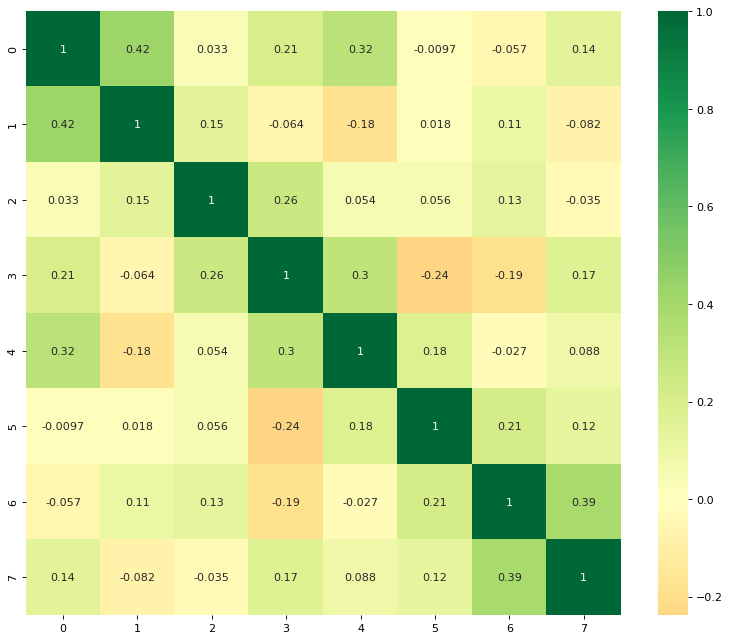

In [28]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.show()

<Figure size 800x640 with 0 Axes>

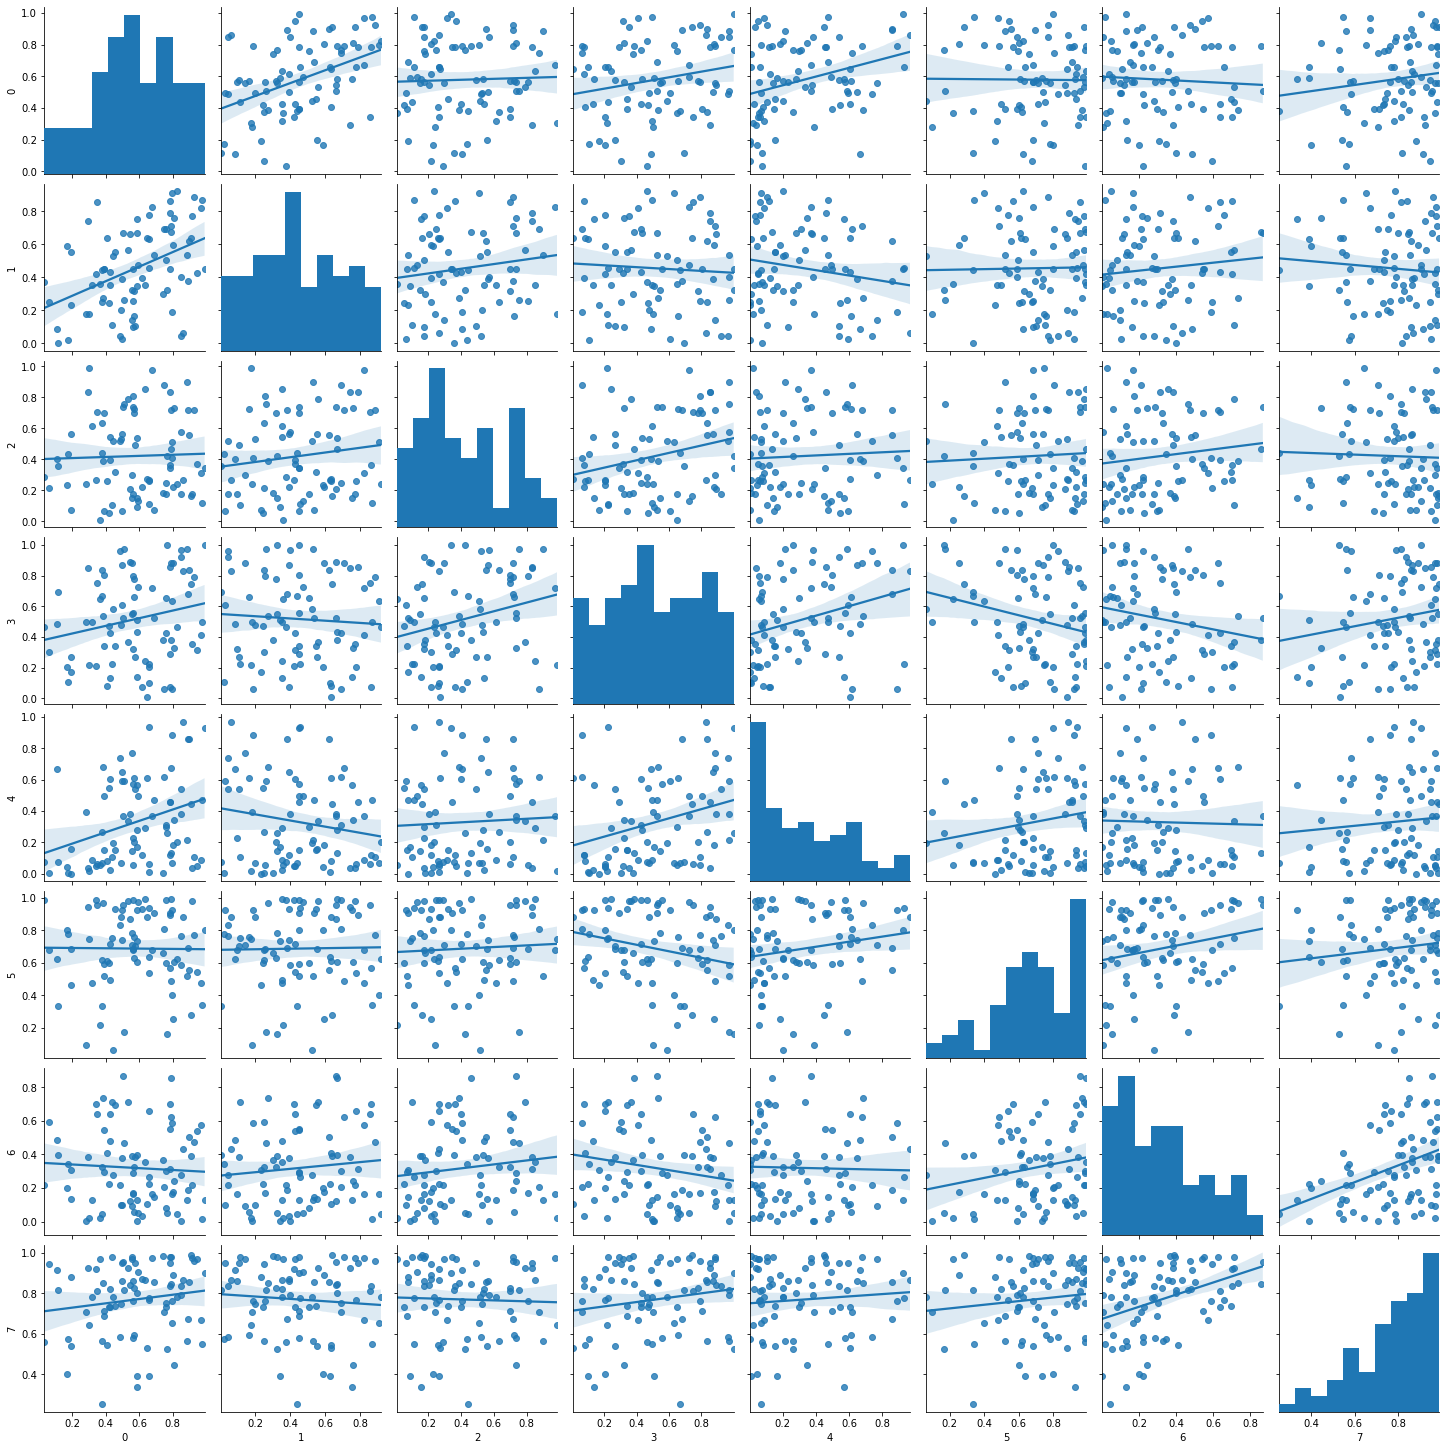

In [32]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="reg")
plt.show()

The visualization of the correct weights, unfortunately, did not give visible results. Data correlates poorly, and is scattered chaotically

### Move pole to the point x = 1

For this task I rewrite cost function. Now I try to minimize reward(penalty) with random search. Reward equals to double distanse to the point x = 1, plus speed in the end of movement. In ideal situation after learning model we recive cart in the position 1 with speed 0. But usually in program we recive just reaching the point, so speed become penalty

In [3]:
env = gym.make('CartPole-v0')
n_state = env.observation_space.shape[0]
n_action = env.action_space.n
print(n_state, n_action)


4 2


In [175]:
def run_ep(env, weight):
    state = env.reset()
    is_done = False
    total_reward = 0
    for i in range(200):
        if is_done :
            total_reward = (2 * abs(1 - state[0])) + abs(state[1])
            return total_reward
        state = torch.from_numpy(state).float()
        action = torch.argmax(torch.matmul(state, weight))
        state, reward, is_done, _ = env.step(action.numpy())
        total_reward = (2 * abs(1 - state[0])) + abs(state[1])
        #print(total_reward)
        if abs(1 - state[0]) < 0.1:
            return total_reward
        #env.render()
    #env.close()
    return total_reward

def run_ep_with_render(env, weight):
    state = env.reset()
    is_done = False
    total_reward = 0
    for i in range(200):
        if is_done :
            total_reward = (2 * abs(1 - state[0])) + abs(state[1])
            return total_reward
        state = torch.from_numpy(state).float()
        action = torch.argmax(torch.matmul(state, weight))
        state, reward, is_done, _ = env.step(action.numpy())
        total_reward = (2 * abs(1 - state[0])) + abs(state[1])
        #print(state[1])
        if abs(1 - state[0]) < 0.1:
            return total_reward
        env.render()
    env.close()
    return total_reward


In [176]:
weight = torch.rand(4,2)
best_weight = torch.rand(4,2)
noise = 0.01
min_reward = 1000
state = env.reset()
total_reward = []
for i in range(300):
    reward_sum = 0
    weight = best_weight + noise * torch.rand(4,2)
    for i in range(5):
        reward = run_ep(env, weight)
        
    reward = run_ep(env, weight)
    total_reward.append(reward)
    print(reward)
    if reward < min_reward:
        min_reward = min(reward, min_reward)
        best_weight = weight
        noise = max(noise/2, 0.0001)
    else:
        noise = min(noise*2, 1)
print("Result: ", sum(total_reward)/len(total_reward))
print("Best: ", min_reward)

2.812227848582727
2.1000731870432494
2.7302319250196905
2.8916924111778535
2.131362727685528
1.7680280358217364
1.5080572833797636
2.7248428703184384
1.9134680543586065
1.825809173585949
3.481253319306929
3.2122931474819763
4.129608133121651
2.718533565513062
3.4586941979007406
4.545913824544831
2.038332098544701
2.6354518549703094
3.4793950120257064
3.3391844062315545
3.517756313372276
2.051574693014383
1.9645049752213473
3.581248179602844
1.7337611370386519
4.126351713677676
0.7170287429263877
1.9859170148182446
3.28869546003009
1.7066018054821683
1.0711208875641733
2.2546950839997324
2.1114193230612335
3.0132948411406715
2.912298500802547
2.946139082964276
3.834988539901197
4.704364111183986
3.5567558781408524
3.1226815988244097
3.3202163910162885
4.037846902191786
4.252385171766539
4.869107288661956
1.8061570619824057
1.983428343366678
3.3719337546892625
6.556125091109465
0.7295508979522244
2.533093166324605
4.0531336834007
2.1928562820490622
3.5882891967554658
1.978845396574583
2.

In [177]:
env.reset()
reward = run_ep_with_render(env, best_weight)
print(reward)
env.close()

1.2699600545961285
